<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/FIAP/Template/template_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# 1. Carga de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 2. Carga de dados
pib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")

# 3. separação treino e teste
treino = pib.iloc[0:126]
teste = pib.iloc[126:138]

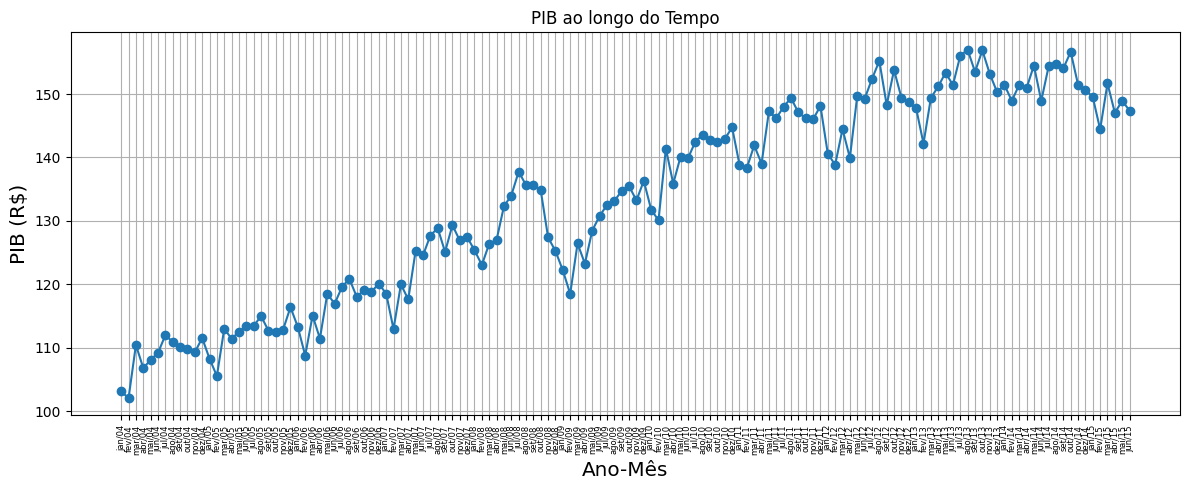

In [48]:
df = pib

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['ANO_MES'], df['PIB'], marker='o', linestyle='-')

plt.title('PIB ao longo do Tempo')
plt.xlabel('Ano-Mês')
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=4)
plt.ylabel('PIB (R$)')
plt.grid(True)
plt.tight_layout()

plt.show()

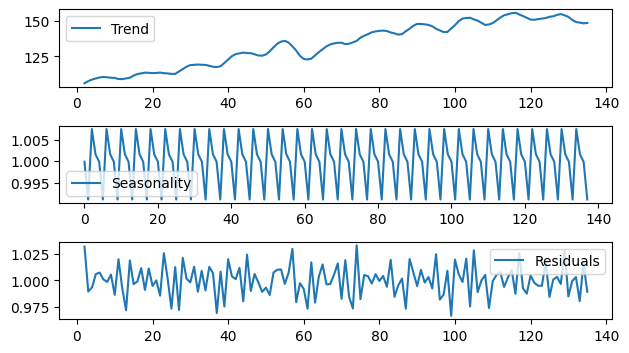

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['PIB'], model='multiplicative', period=4)



plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [51]:
# Lag
pib
pib['PIBi1_']= pib['PIB'].shift(1)
pib

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03


In [52]:
# Rolling
pib.rolling(12).mean()

<ipython-input-52-6d1fe210055a>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['ANO_MES'], dtype='object')
  pib.rolling(12).mean()


,Unnamed: 0,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,PRP,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,128.5,151.803333,156.998333,158.539167,156.881667,160.900833,175.121667,163.502500,168.355833,139.9100,...,152.450000,152.469167,152.424167,152.610000,152.752500,152.960833,152.866667,152.890000,152.715833,152.178333
134,129.5,151.823333,156.514167,158.701667,156.563333,160.569167,175.305000,163.244167,167.012500,140.4150,...,152.305000,152.450000,152.469167,152.424167,152.610000,152.752500,152.960833,152.866667,152.890000,151.803333
135,130.5,151.499167,156.510000,157.869167,156.353333,160.524167,174.455833,162.978333,166.414167,139.8175,...,152.338333,152.305000,152.450000,152.469167,152.424167,152.610000,152.752500,152.960833,152.866667,151.823333
136,131.5,151.036667,156.508333,156.828333,156.090833,160.695000,173.409167,162.828333,166.266667,139.1350,...,152.178333,152.338333,152.305000,152.450000,152.469167,152.424167,152.610000,152.752500,152.960833,151.499167


In [68]:
#Imputation

#pib.iloc[37][['PIB']]=np.NaN

# FILL FORWARD
df.at[37, 'PIB']=np.NaN

In [71]:
df.at[37, 'PIB']

df['PIBt'] = df['PIB'].fillna(method='ffill')

In [78]:
df.at[35, 'PIBt']

120.07

In [80]:
# INTERPOLAÇÃO
df['PIBt'] = df['PIB'].interpolate()
df.iloc[30:40]

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt
30,31,jul/06,119.58,105.04,125.39,109.59,106.60,139.78,113.97,102.86,...,108.75,113.25,116.38,112.86,112.40,112.70,114.97,113.43,116.92,119.58
31,32,ago/06,120.86,98.52,132.42,106.10,99.75,147.78,110.41,89.63,...,115.06,108.75,113.25,116.38,112.86,112.40,112.70,114.97,119.58,120.86
32,33,set/06,118.01,99.62,125.44,105.39,101.20,140.77,109.99,94.71,...,111.44,115.06,108.75,113.25,116.38,112.86,112.40,112.70,120.86,118.01
33,34,out/06,119.12,102.56,129.49,108.58,103.62,143.96,112.58,96.26,...,118.50,111.44,115.06,108.75,113.25,116.38,112.86,112.40,118.01,119.12
34,35,nov/06,118.83,103.19,127.42,108.61,104.69,143.12,113.22,94.45,...,116.92,118.50,111.44,115.06,108.75,113.25,116.38,112.86,119.12,118.83
35,36,dez/06,120.07,122.65,125.45,123.28,122.75,139.63,126.50,131.44,...,119.58,116.92,118.50,111.44,115.06,108.75,113.25,116.38,118.83,120.07
36,37,jan/07,118.52,120.36,119.78,120.23,117.84,132.56,121.10,140.13,...,120.86,119.58,116.92,118.50,111.44,115.06,108.75,113.25,120.07,118.52
37,38,fev/07,NaN,103.77,110.95,105.37,101.90,121.44,106.24,105.77,...,118.01,120.86,119.58,116.92,118.50,111.44,115.06,108.75,118.52,119.25
38,39,mar/07,119.98,104.32,134.03,110.96,105.49,146.28,114.55,96.40,...,119.12,118.01,120.86,119.58,116.92,118.50,111.44,115.06,112.92,119.98
39,40,abr/07,117.61,105.28,121.33,108.87,107.31,133.43,113.11,98.93,...,118.83,119.12,118.01,120.86,119.58,116.92,118.50,111.44,119.98,117.61


In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv", encoding='unicode_escape', sep='\t', header=None)

<ipython-input-12-c0e55cb47a81>:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv", encoding='unicode_escape', sep='\t', header=None)


In [20]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
5,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1
6,7,C,15,Carga,0,1,F,2,2,0,...,0,0,0,0,1,N,40,413,413,1
7,8,C,25,Web,0,1,F,1,0,0,...,0,0,0,0,1,N,28,686,686,0
8,9,C,15,0,0,1,F,1,0,0,...,0,0,0,0,2,N,31,172,172,0
9,10,C,5,0,0,1,F,1,0,0,...,0,0,0,0,1,N,41,914,914,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[7].plot(kind='hist', bins=20, title=7)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby(3).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby(6).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby(16).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: '0'

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x=0, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x=2, y=7, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x=7, y=8, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: '3'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('3')):
  _plot_series(series, series_name, i)
  fig.legend(title='3', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('2')

KeyError: '6'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('6')):
  _plot_series(series, series_name, i)
  fig.legend(title='6', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('2')

KeyError: '16'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('16')):
  _plot_series(series, series_name, i)
  fig.legend(title='16', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('2')

KeyError: '3'

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['7']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('3')):
  _plot_series(series, series_name, i)
  fig.legend(title='3', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('7')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18[7].plot(kind='line', figsize=(8, 4), title=7)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp[6].value_counts()
    for x_label, grp in _df_19.groupby(3)
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel(3)
_ = plt.ylabel(6)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp[16].value_counts()
    for x_label, grp in _df_20.groupby(6)
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel(6)
_ = plt.ylabel(16)

KeyError: '3'

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['3'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='3', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

KeyError: '6'

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['6'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='6', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

KeyError: '16'

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['16'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='16', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24[3].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x=0, y=3, inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)